In [12]:
import warnings

# import holoviews as hv
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import shapely
import pandas as pd
import pystac_client
import xarray as xr
import rioxarray as rio
import pathlib
import geopandas as gpd

#import colormaps as cmaps
import pyam # https://pyam-iamc.readthedocs.io/en/latest/index.html
import matplotlib.colors as mcolors

from copy import deepcopy
from typing import List, Dict

# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# load the CoCliCo STAC catalog
catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/coclico-data-public/coclico/coclico-stac/catalog.json"
)
# catalog

# list the datasets present in the catalog, we are interested in the slp5 and slp6 sets
list(catalog.get_children())

[<CollectionClient id=floodmaps>,
 <CollectionClient id=cbca>,
 <CollectionClient id=cfr>,
 <CollectionClient id=smd>,
 <CollectionClient id=cisi>,
 <CollectionClient id=slp5>,
 <CollectionClient id=slp6>,
 <CollectionClient id=coastal-mask>,
 <CollectionClient id=overture-building-footprints>,
 <CollectionClient id=gctr>,
 <CollectionClient id=ceed>,
 <CollectionClient id=shorelinemonitor-shorelines>,
 <CollectionClient id=shorelinemonitor-raw-series>,
 <CollectionClient id=gcts>,
 <CollectionClient id=slp>,
 <CollectionClient id=ss_wc>,
 <CollectionClient id=twl>,
 <CollectionClient id=cet>,
 <CollectionClient id=CFHP_LAU_stats>,
 <CollectionClient id=ssl>,
 <CollectionClient id=wef>,
 <CollectionClient id=eesl>,
 <CollectionClient id=sc>,
 <CollectionClient id=NUTS_CM>,
 <CollectionClient id=NUTS>,
 <CollectionClient id=LAU>,
 <CollectionClient id=deltares-delta-dtm>,
 <CollectionClient id=pp>,
 <CollectionClient id=LAU_CM>,
 <CollectionClient id=NUTS0_CM>,
 <CollectionClient id=NUT

In [3]:
# function to put items in dataframe
def items_to_dataframe(items: List[Dict]) -> pd.DataFrame:
    """STAC items to Pandas dataframe.

    Args:
        items (List[Dict]): _description_

    Returns:
        pd.DataFrame: _description_
    """
    _items = []
    for i in items:
        _i = deepcopy(i)
        # _i['geometry'] = shape(_i['geometry'])
        # ...  # for example, drop some attributes that you're not interested in
        _items.append(_i)
    df = pd.DataFrame(pd.json_normalize(_items))
    # for field in ["properties.datetime"]:
    #     if field in df:
    #         df[field] = pd.to_datetime(df[field])
    # df = df.sort_values("properties.datetime")
    return df

In [25]:
ar5_col = catalog.get_child("cba")
items_ar5 = list(ar5_col.get_items()) # this is slow as we need to list all items
items_ar5_df = items_to_dataframe([i.to_dict() for i in items_ar5])
ar5_col

<CollectionClient id=cba>

In [26]:
# filter AR5 dataframe and STAC items on index
items_df_fil5 = items_ar5_df.filter(items = [0], axis=0)
items_fil5 = [items_ar5[i] for i in [0]]

In [27]:
#open parquet file 
ar5_item_href = items_fil5[0].assets["data"].href
#ar5_item_href

ar5_item = pd.read_parquet(ar5_item_href)

In [28]:
ar5_item["geometry"]

0                                                  None
1     b'\x01\x06\x00\x00\x00\x03\x00\x00\x00\x01\x03...
2     b'\x01\x06\x00\x00\x00\x06\x00\x00\x00\x01\x03...
3     b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xf9\x07...
4     b'\x01\x06\x00\x00\x00p\x01\x00\x00\x01\x03\x0...
5     b'\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03...
6     b'\x01\x06\x00\x00\x00\x0b\x01\x00\x00\x01\x03...
7     b'\x01\x06\x00\x00\x00@\x00\x00\x00\x01\x03\x0...
8                                                  None
9     b'\x01\x06\x00\x00\x00\xb1\x03\x00\x00\x01\x03...
10    b'\x01\x06\x00\x00\x00\xee\x00\x00\x00\x01\x03...
11    b'\x01\x06\x00\x00\x00G\x00\x00\x00\x01\x03\x0...
12                                                 None
13    b'\x01\x06\x00\x00\x00.\x02\x00\x00\x01\x03\x0...
14    b'\x01\x06\x00\x00\x00q\x00\x00\x00\x01\x03\x0...
15    b'\x01\x06\x00\x00\x00C\x01\x00\x00\x01\x03\x0...
16    b'\x01\x06\x00\x00\x00v\x00\x00\x00\x01\x03\x0...
17    b'\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01

In [29]:
ar5_item['geometry'] = ar5_item["geometry"].apply(shapely.wkb.loads)
ar5_item = gpd.GeoDataFrame(ar5_item,geometry="geometry",crs="EPSG:3035")
ar5_item

,country,coast_length,NUTS_ID,geometry,protection_SSP126_2050,costs_adaptation_SSP126,costs_damage_SSP126,costs_SSP126
0,Aaland,3886.0,None,None,0.0,0.2,0.0,0.2
1,Albania,753.0,AL,"MULTIPOLYGON (((5121233.536 2221719.441, 51208...",10.7,1.3,25.5,26.8
2,Belgium,319.0,BE,"MULTIPOLYGON (((3962902.889 3162436.894, 39626...",97.3,16.3,10.7,27.0
3,Bulgaria,466.0,BG,"POLYGON ((5330611.947 2430822.479, 5332044.063...",0.4,0.1,0.9,1.0
4,Croatia,5309.0,HR,"MULTIPOLYGON (((4809428.353 2624702.722, 48094...",3.5,1.2,0.7,1.8
5,Cyprus,641.0,CY,"MULTIPOLYGON (((6527040.718 1762367.593, 65267...",0.0,0.0,0.3,0.3
6,Denmark,6527.0,DK,"MULTIPOLYGON (((4650502.736 3591342.844, 46503...",16.8,28.8,14.0,42.7
7,Estonia,2559.0,EE,"MULTIPOLYGON (((5200046.875 4159874.733, 52002...",0.0,2.1,0.2,2.2
8,Faroe Islands,919.0,None,None,1.9,0.5,0.3,0.8
9,Finland,17922.0,FI,"MULTIPOLYGON (((5003266.058 5307016.629, 50049...",6.1,12.0,7.0,19.0


<Axes: >

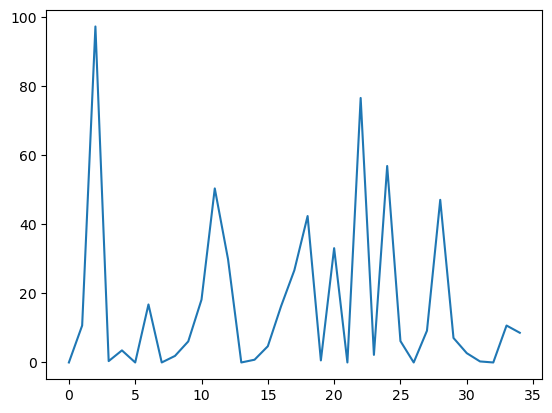

In [31]:
ar5_item[R"protection_SSP126_2050"].plot()